In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import re
import unidecode

In [2]:
def limpiar_y_convertir_precio(precio_str):
    tipo_cambio_usd_mxn = 18.66
    # Manejar valores nulos o no válidos
    if pd.isna(precio_str) or not isinstance(precio_str, str):
        return None

    # Detectar el tipo de moneda
    if precio_str.startswith('USD'):
        # Limpiar el string: quitar "USD " y las comas
        valor_numerico_str = precio_str.replace('USD ', '').replace(',', '')
        try:
            valor_numerico = float(valor_numerico_str)
            # Convertir a MXN
            return int(valor_numerico * tipo_cambio_usd_mxn)
        except ValueError:
            return None
    elif precio_str.startswith('MN'):
        # Limpiar el string: quitar "MN " y las comas
        valor_numerico_str = precio_str.replace('MN ', '').replace(',', '')
        try:
            return int(valor_numerico_str)
        except ValueError:
            return None
    else:
        # Si el formato no coincide, devolver un valor nulo
        return None


In [3]:
# Ruta de los directorios que contienen los archivos CSV
directorio_path = ["/Users/renataramirez/Documents/mlops-repo/data/raw/webscrapping/por_municipio_2025-08-31",
                   "/Users/renataramirez/Documents/mlops-repo/data/raw/webscrapping/por_municipio_2025-09-14", #9227
                   "/Users/renataramirez/Documents/mlops-repo/data/raw/webscrapping/por_municipio_2025-09-20",]


In [4]:

# Lista para almacenar los DataFrames individuales
lista_dfs = []


In [5]:
archivos_csv = []
# Buscar todos los archivos con la extensión .csv en el directorio
for path in directorio_path:
    archivos = glob.glob(os.path.join(path, "*.csv"))
    archivos_csv = archivos_csv + archivos


In [6]:
len(archivos_csv)

45

In [7]:
# Iterar sobre cada archivo encontrado
for archivo in archivos_csv:
    # Leer el archivo CSV en un DataFrame
    df_temp = pd.read_csv(archivo)

    # Añadir el DataFrame temporal a la lista
    lista_dfs.append(df_temp)

In [8]:
df = pd.concat(lista_dfs, ignore_index=True)
print("DataFrame final creado con éxito. Se añadieron los siguientes archivos:")

DataFrame final creado con éxito. Se añadieron los siguientes archivos:


In [9]:
df.columns

Index(['Título', 'Enlace', 'Precio', 'Dirección', 'Características',
       'Municipio de Origen'],
      dtype='object')

In [10]:
df['Municipio de Origen'].value_counts()

Municipio de Origen
Miguel Hidalgo            7027
Cuauhtémoc                4776
Benito Juárez             2691
Cuajimalpa de Morelos     1995
Álvaro Obregón            1709
Coyoacán                   529
Tlalpan                    377
Gustavo A. Madero          295
Azcapotzalco               289
Iztacalco                  168
Venustiano Carranza        165
La Magdalena Contreras     116
Iztapalapa                 105
Tláhuac                     90
Xochimilco                  90
Name: count, dtype: int64

In [11]:
print("\nPrimeras 5 filas del DataFrame final:")
df.head()


Primeras 5 filas del DataFrame final:


,Título,Enlace,Precio,Dirección,Características,Municipio de Origen
0,Departamento en Renta – San Jerónimo (100 m²) ...,https://www.inmuebles24.com/propiedades/clasif...,"MN 24,000","San Jerónimo Lidice\nSan Jerónimo Lídice, La M...","100 m² lote, 2 rec., 2 baños, 1 estac.",La Magdalena Contreras
1,Departamento remodelado. amueblado. frente al ...,https://www.inmuebles24.com/propiedades/clasif...,"MN 12,000","CALLEJON DEL PRADO\nBarrio San Francisco, La M...","50 m² lote, 1 rec., 1 baño, 1 estac.",La Magdalena Contreras
2,Ph en san jeronimo lidice. Departamento con ma...,https://www.inmuebles24.com/propiedades/clasif...,"MN 34,100","BLVD. ADOLFO RUIZ CORTINES, 2775\nSan Jerónimo...","232 m² lote, 3 rec., 4 baños, 2 estac.",La Magdalena Contreras
3,"Se renta casa de 80m2, más 85m2 de jardines. S...",https://www.inmuebles24.com/propiedades/clasif...,"MN 16,000","Magnolia 26\nSan Jerónimo Lídice, La Magdalena...","165 m² lote, 2 rec., 1 baño, 1 estac.",La Magdalena Contreras
4,"Exclusivo conjunto en Pedregal 2, cuenta con c...",https://www.inmuebles24.com/propiedades/clasif...,"MN 26,000","San Marcos 11\nPedregal 2, La Magdalena Contreras","180 m² lote, 3 rec., 2 baños, 2 estac.",La Magdalena Contreras


In [12]:
df.shape

(20422, 6)

In [13]:
# Remove duplicates
df = df.drop_duplicates()

In [14]:
#9227
df.shape

(10685, 6)

In [15]:
df.dtypes

Título                 object
Enlace                 object
Precio                 object
Dirección              object
Características        object
Municipio de Origen    object
dtype: object

In [16]:
df['Precio'] = df['Precio'].str.strip()

In [17]:
# Transformar el precio a columna númerica
df['precio_mxn'] = df['Precio'].apply(limpiar_y_convertir_precio)


In [18]:
df[df['Precio'] == 'MN 3,849,092'] 

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn
693,Con una ubicación privilegiada y excelentes am...,https://www.inmuebles24.com/propiedades/clasif...,"MN 3,849,092","bucareli\nJuárez, Cuauhtémoc","76 m² lote, 2 rec., 2 baños, 1 estac.",Cuauhtémoc,3849092.0


In [19]:
row_to_fix = df['Precio'] == 'MN 3,849,092'

# Re-aplica la función corregida solo a esa fila, dividiendo por 100
df.loc[row_to_fix, 'precio_mxn'] = float(
    df.loc[row_to_fix, 'Precio']
    .iloc[0] # Selecciona el valor de la celda específica
    .replace('MN ', '')
    .replace(',', '')
) / 100


In [20]:
df[df['Precio'] == 'MN 3,849,092']

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn
693,Con una ubicación privilegiada y excelentes am...,https://www.inmuebles24.com/propiedades/clasif...,"MN 3,849,092","bucareli\nJuárez, Cuauhtémoc","76 m² lote, 2 rec., 2 baños, 1 estac.",Cuauhtémoc,38490.92


In [21]:
row_to_fix = df['Precio'] == 'MN 19,250,000'

# Re-aplica la función corregida solo a esa fila, dividiendo por 100
df.loc[row_to_fix, 'precio_mxn'] = float(
    df.loc[row_to_fix, 'Precio']
    .iloc[0] # Selecciona el valor de la celda específica
    .replace('MN ', '')
    .replace(',', '')
) / 1000


In [22]:
df[df['Precio'] == 'MN 19,250,000']

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn
12052,Departamento en Renta con 2 Recámaras con clos...,https://www.inmuebles24.com/propiedades/clasif...,"MN 19,250,000","Vértiz Narvarte\nNarvarte Oriente, Benito Juárez","60 m² lote, 2 rec., 1 baño, 1 estac.",Benito Juárez,19250.0


In [23]:
# Conjunto para almacenar los nombres de características únicos
caracteristicas_unicas = set()

# Expresión regular para encontrar el nombre de la característica
# Busca un número (y opcionalmente m²) seguido del nombre de la característica
patron = re.compile(r'\d+\s*(?:m²)?\s*([a-záéíóúüñ\s\w]+\b)\.?', re.IGNORECASE)

# Iterar sobre cada fila para analizar la columna 'caracteristicas'
for caracteristicas_str in df['Características']:
    if isinstance(caracteristicas_str, str):
        # Encontrar todas las coincidencias en la cadena
        matches = patron.findall(caracteristicas_str)
        
        # Añadir cada característica encontrada al conjunto
        for match in matches:
            # Limpiar el nombre (eliminar espacios y puntos finales)
            nombre_limpio = match.strip().replace('.', '')
            caracteristicas_unicas.add(nombre_limpio)

In [24]:
caracteristicas_unicas

{'a 2 rec',
 'a 80 m² lote',
 'a 95 m² lote',
 'baño',
 'baños',
 'estac',
 'lote',
 'rec',
 'un'}

In [25]:
# Con la revisión de outliers vimos que hay lcoales comerciales con precios altos que no deberíamos estar incluyendo, 
# así que creamos esta flag para identificarlos y excluirlos.
# 1. Usar .str.contains() para buscar las palabras "local comercial" (ignorando mayúsculas y minúsculas)
# 2. Usar .astype(int) para convertir True/False a 1/0
df['es_local_comercial'] = df['Título'].str.contains('local comercial', case=False, na=False).astype(int)

In [26]:
df.es_local_comercial.value_counts()

es_local_comercial
0    10678
1        7
Name: count, dtype: int64

In [27]:
df = df[df.es_local_comercial == 0]

In [28]:
# Borramos la columna porque ya no será necesaria
df = df.drop('es_local_comercial', axis = 1)

In [29]:
# Definimos la leyenda a eliminar
leyenda_a_eliminar = '*Aviso de privacidad sugerencias, quejas, aclaraciones, consultar nuestra página. El precio no incluye el mobiliario, electrodomésticos, artículos de decoración y/o arte que pudieran aparecer en las fotografías. El precio de venta no incluye gastos e impuestos de escrituración, o gastos derivados por algún tipo de credito.'

# Eliminamos la leyenda de la columna 'Título'
df['Título'] = df['Título'].str.replace(leyenda_a_eliminar, '', regex=False)

# Opcional: eliminar espacios extra que puedan quedar al final
df['Título'] = df['Título'].str.strip()

In [30]:
# Extraer "lote en m2"
# El patrón busca: (un grupo de dígitos) seguido de " m² lote"
df['lote_m2'] = df['Características'].str.extract(r'(\d+)\s*m²\s*lote', flags=re.IGNORECASE).astype('Int64')

# Extraer "recamaras"
# El patrón busca: (un grupo de dígitos) seguido de " rec." (el punto es opcional)
df['recamaras'] = df['Características'].str.extract(r'(\d+)\s*rec\.?', flags=re.IGNORECASE).astype('Int64')

# Extraer "baños"
# El patrón busca: (un grupo de dígitos) seguido de " baños"
df['baños'] = df['Características'].str.extract(r'(\d+)\s*baño\s?', flags=re.IGNORECASE).astype('Int64')

# Extraer "estacionamiento"
# El patrón busca: (un grupo de dígitos) seguido de " estac" o " estac."
df['estacionamiento'] = df['Características'].str.extract(r'(\d+)\s*estac\.?', flags=re.IGNORECASE).astype('Int64')


In [31]:
df.lote_m2.isnull().sum()

106

In [32]:
df['recamaras'].isnull().sum()

322

In [33]:
df.baños.isnull().sum()

170

In [34]:
df.estacionamiento.isnull().sum()

2531

In [35]:
# por los flatantes en el estacionamiento, cuando no viene en los detalles básicos doblechequeamos que venga en la descripción
# 1. Usar .str.contains() para buscar la palabra "estacionamiento" (ignorando mayúsculas y minúsculas)
# 2. Usar .astype(int) para convertir True/False a 1/0
df['estacionamiento_txt'] = df['Título'].str.contains('estacionamiento', case=False, na=False).astype(int)

In [36]:
# Revisamos el cruce de las columnas de estacionamiento para ver si aporta más información juntarlas y vemos que 
# sí hay reistros donde el estacionamiento estaba vacío e inspeccionando la descripción encontramos más.
pd.crosstab(df['estacionamiento'].fillna(0), df['estacionamiento_txt'])

estacionamiento_txt,0,1
estacionamiento,,
0,1360,1171
1,702,3099
2,521,2980
3,97,463
4,33,186
5,5,16
6,2,24
7,0,1
8,2,11


In [37]:
# Así que complementamos la columna
df['estacionamiento'] = np.where(~df['estacionamiento'].isnull(), df['estacionamiento'], 
                                 np.where((df['estacionamiento'].isnull())&(df['estacionamiento_txt']==1),1,0))

In [38]:
df['estacionamiento'].value_counts()

estacionamiento
1.0     4972
2.0     3501
0.0     1360
3.0      560
4.0      219
6.0       26
5.0       21
8.0       13
12.0       2
22.0       1
7.0        1
11.0       1
13.0       1
Name: count, dtype: int64

In [39]:
# 1. Usar .str.contains() para buscar la palabra "renta" (ignorando mayúsculas y minúsculas)
# 2. Usar .astype(int) para convertir True/False a 1/0
df['en_renta'] = df['Título'].str.contains(' renta ', case=False, na=False).astype(int)

In [40]:
df.en_renta.value_counts()

en_renta
1    5350
0    5328
Name: count, dtype: int64

In [41]:
# 1. Usar .str.contains() para buscar la palabra "venta" (ignorando mayúsculas y minúsculas)
# 2. Usar .astype(int) para convertir True/False a 1/0
df['en_venta'] = df['Título'].str.contains(' venta |se vende|preventa|venta departamento', case=False, na=False).astype(int)

In [42]:
df.en_venta.value_counts()

en_venta
0    10312
1      366
Name: count, dtype: int64

In [43]:
pd.crosstab(df.en_renta, df.en_venta)

en_venta,0,1
en_renta,,
0,5174,154
1,5138,212


In [44]:
# para filtrar los departamentos en venta tienen que tener la flag de venta y costo mayor a 1M 
# Y también hay casos en que no ponen un monto de venta pero ponen 1 MXN por poner algo
df = df[((df.en_venta==0)&(df.precio_mxn > 1)&(df.precio_mxn < 1000000))]

In [45]:
df.shape

(10258, 14)

In [46]:
df[(df.en_venta==1)&(df.en_renta==0)].sort_values('precio_mxn',ascending=False)

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn,lote_m2,recamaras,baños,estacionamiento,estacionamiento_txt,en_renta,en_venta


In [47]:
df[(df.en_venta==1)&(df.en_renta==1)]

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn,lote_m2,recamaras,baños,estacionamiento,estacionamiento_txt,en_renta,en_venta


In [48]:
# 1. Usar .str.contains() para buscar la palabra "amueblado" (ignorando mayúsculas y minúsculas)
# 2. Usar .astype(int) para convertir True/False a 1/0
df['es_amueblado'] = df['Título'].str.contains('amueblado', case=False, na=False).astype(int)

In [49]:
df.es_amueblado.value_counts()

es_amueblado
0    7183
1    3075
Name: count, dtype: int64

In [50]:
# 1. Usar .str.contains() para buscar la palabra "amueblado" (ignorando mayúsculas y minúsculas)
# 2. Usar .astype(int) para convertir True/False a 1/0
df['es_penthouse'] = df['Título'].str.contains('penthouse| ph |pentgarden|departamento de lujo', case=False, na=False).astype(int)

In [51]:
df.es_penthouse.value_counts()

es_penthouse
0    9831
1     427
Name: count, dtype: int64

In [52]:
df.isnull().sum()

Título                   1
Enlace                   0
Precio                   0
Dirección                0
Características          3
Municipio de Origen      0
precio_mxn               0
lote_m2                 72
recamaras              289
baños                  134
estacionamiento          0
estacionamiento_txt      0
en_renta                 0
en_venta                 0
es_amueblado             0
es_penthouse             0
dtype: int64

In [53]:
df[df.en_renta == 1].precio_mxn.describe()

count      5136.000000
mean      37109.790498
std       30748.415243
min        2000.000000
25%       19000.000000
50%       28000.000000
75%       43000.000000
max      447840.000000
Name: precio_mxn, dtype: float64

In [54]:
df = df[~df['Enlace'].isin(['https://www.inmuebles24.com/propiedades/clasificado/alclapin-departamento-en-el-rosario-147407511.html'])]

In [55]:
# Queremos identificar outliers
df.sort_values('precio_mxn', ascending=False)[:10]

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn,lote_m2,recamaras,baños,estacionamiento,estacionamiento_txt,en_renta,en_venta,es_amueblado,es_penthouse
3627,Vive la Exclusividad de Rubén Darío: Estrena D...,https://www.inmuebles24.com/propiedades/clasif...,"USD 24,000","Rubén Darío Polanco, Miguel Hidalgo\nPolanco, ...","420 m² lote, 3 rec., 3 baños, 4 estac.",Miguel Hidalgo,447840.0,420,3,3,4.0,1,1,0,1,1
2245,"Propiedad Exclusiva, amueblada, equipada y dec...",https://www.inmuebles24.com/propiedades/clasif...,"USD 21,000","Sierra Vertientes 444\nLomas de Chapultepec, M...","1400 m² lote, 5 rec., 5 baños, 8 estac.",Miguel Hidalgo,391860.0,1400,5,5,8.0,1,0,0,0,0
803,En uno de los lugares más icónicos de la Roma ...,https://www.inmuebles24.com/propiedades/clasif...,"MN 300,000","Medellin 43\nRoma Norte, Cuauhtémoc","1200 m² lote, 7 rec., 8 baños, 4 estac.",Cuauhtémoc,300000.0,1200,7,8,4.0,1,1,0,0,1
10839,"Pentgarden en renta $15, 500 us. En paseo de l...",https://www.inmuebles24.com/propiedades/clasif...,"USD 15,500","Lomas Altas Miguel Hidalgo\nLomas Altas, Migue...","670 m² lote, 4 rec., 4 baños, 6 estac.",Miguel Hidalgo,289230.0,670,4,4,6.0,1,1,0,0,1
17691,"Venta: $3, 300, 000 usdrenta: $15, 500 usd670 ...",https://www.inmuebles24.com/propiedades/clasif...,"USD 15,500","Paseo de la Reforma, Lomas Altas, Miguel Hidal...","670 m² lote, 4 rec., 4 baños, 6 estac.",Miguel Hidalgo,289230.0,670,4,4,6.0,1,1,0,0,0
6315,"Venta y/o renta amueblado, En Renta: 15, 000. ...",https://www.inmuebles24.com/propiedades/clasif...,"USD 15,000",Prolongación Bosque de la Reforma\nBosques de ...,"575 m² lote, 4 rec., 4 baños, 8 estac.",Cuajimalpa de Morelos,279900.0,575,4,4,8.0,0,1,0,1,0
2660,Exclusivo departamento en renta. Techos de dob...,https://www.inmuebles24.com/propiedades/clasif...,"USD 15,000","Campos Elíseos\nPolanco, Miguel Hidalgo","450 m² lote, 3 rec., 3 baños, 4 estac.",Miguel Hidalgo,279900.0,450,3,3,4.0,1,0,0,0,0
2444,"Precioso ph en la calle de plinio, completamen...",https://www.inmuebles24.com/propiedades/clasif...,"USD 15,000","plinio\nPolanco, Miguel Hidalgo","270 m² lote, 3 rec., 3 baños, 3 estac.",Miguel Hidalgo,279900.0,270,3,3,3.0,0,0,0,1,1
5870,Espectacular departamento dentro del club golf...,https://www.inmuebles24.com/propiedades/clasif...,"USD 15,000",Fraccionamiento Club de Golf Bosques de Santa ...,"549 m² lote, 3 rec., 3 baños, 6 estac.",Cuajimalpa de Morelos,279900.0,549,3,3,6.0,1,0,0,0,0
9504,Rubén darío 225 – torre polanco. El edificio r...,https://www.inmuebles24.com/propiedades/clasif...,"USD 15,000","Ruben Dario #225\nPolanco, Miguel Hidalgo","384 m² lote, 3 rec., 4 baños, 4 estac.",Miguel Hidalgo,279900.0,384,3,4,4.0,1,0,0,0,1


In [56]:
df

,Título,Enlace,Precio,Dirección,Características,Municipio de Origen,precio_mxn,lote_m2,recamaras,baños,estacionamiento,estacionamiento_txt,en_renta,en_venta,es_amueblado,es_penthouse
0,Departamento en Renta – San Jerónimo (100 m²) ...,https://www.inmuebles24.com/propiedades/clasif...,"MN 24,000","San Jerónimo Lidice\nSan Jerónimo Lídice, La M...","100 m² lote, 2 rec., 2 baños, 1 estac.",La Magdalena Contreras,24000.0,100,2,2,1.0,1,1,0,0,0
1,Departamento remodelado. amueblado. frente al ...,https://www.inmuebles24.com/propiedades/clasif...,"MN 12,000","CALLEJON DEL PRADO\nBarrio San Francisco, La M...","50 m² lote, 1 rec., 1 baño, 1 estac.",La Magdalena Contreras,12000.0,50,1,1,1.0,1,1,0,1,0
2,Ph en san jeronimo lidice. Departamento con ma...,https://www.inmuebles24.com/propiedades/clasif...,"MN 34,100","BLVD. ADOLFO RUIZ CORTINES, 2775\nSan Jerónimo...","232 m² lote, 3 rec., 4 baños, 2 estac.",La Magdalena Contreras,34100.0,232,3,4,2.0,1,1,0,0,0
3,"Se renta casa de 80m2, más 85m2 de jardines. S...",https://www.inmuebles24.com/propiedades/clasif...,"MN 16,000","Magnolia 26\nSan Jerónimo Lídice, La Magdalena...","165 m² lote, 2 rec., 1 baño, 1 estac.",La Magdalena Contreras,16000.0,165,2,1,1.0,1,1,0,0,0
4,"Exclusivo conjunto en Pedregal 2, cuenta con c...",https://www.inmuebles24.com/propiedades/clasif...,"MN 26,000","San Marcos 11\nPedregal 2, La Magdalena Contreras","180 m² lote, 3 rec., 2 baños, 2 estac.",La Magdalena Contreras,26000.0,180,3,2,2.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20409,"Renta de departamento 8, 500, cuenta con sala,...",https://www.inmuebles24.com/propiedades/clasif...,"MN 8,500",Plutarco Elías Calles\nAmpliación San Pedro Xa...,"70 m² lote, 2 rec., 1 baño",Azcapotzalco,8500.0,70,2,1,1.0,1,1,0,0,0
20410,Campo atasta 181 / tercer nivel. llama al Ver ...,https://www.inmuebles24.com/propiedades/clasif...,"MN 10,000","Campo Atasta\nSan Antonio, Azcapotzalco","47 m² lote, 2 rec., 1 baño",Azcapotzalco,10000.0,47,2,1,1.0,1,1,0,0,0
20412,Se renta departamento con baño propio. 10 minu...,https://www.inmuebles24.com/propiedades/clasif...,"MN 5,500",1a. Cda. Petróleos Mexicanos\nAmpliación Petro...,"38 m² lote, 1 rec., 1 baño",Azcapotzalco,5500.0,38,1,1,0.0,0,1,0,0,0
20413,"Excelente ubicacion, se encuentra A una calle ...",https://www.inmuebles24.com/propiedades/clasif...,"MN 15,000","Cda. de las Granjas\nEl Jagüey, Azcapotzalco","67 m² lote, 2 rec., 1 baño, 1 estac.",Azcapotzalco,15000.0,67,2,1,1.0,1,0,0,0,0


## Bag of words

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# Reemplazar los valores nulos (NaN), lo reemplazamos con una cadena de texto vacía
df['Título'] = df['Título'].fillna('')

# Definimos los stopwords en español
spanish_stopwords = [
    'un', 'una', 'unos', 'unas', 'el', 'la', 'los', 'las', 'de', 'en', 'con',
    'y', 'es', 'son', 'por', 'para', 'del', 'al', 'que', 'se', 'mas', 'más',
    'su', 'sus', 'o', 'tu', 'no', 'así como', 'me', 'cuenta', 'como', 'muy', '24', 
    'lo', 'este', 'sin', 'tiene', 'dos'
]
vectorizer = CountVectorizer(stop_words=spanish_stopwords)
bow_matrix = vectorizer.fit_transform(df['Título'])

# 3. Obtener las palabras y sus frecuencias
vocabulario = vectorizer.get_feature_names_out()
word_counts = bow_matrix.sum(axis=0)

# Crear un DataFrame con las palabras y sus frecuencias
word_freq_df = pd.DataFrame({'Palabra': vocabulario, 'Frecuencia': word_counts.A1})

# 4. Ordenar y seleccionar las 10 palabras más frecuentes
word_freq_df = word_freq_df.sort_values(by='Frecuencia', ascending=False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['así'] not in stop_words.
  warnings.warn(


In [58]:
df_25p = df.shape[0]/4

In [59]:
top_n = word_freq_df[word_freq_df.Frecuencia > df_25p].shape[0]

In [60]:
word_freq_df.shape

(19607, 2)

In [61]:
top_n*100/word_freq_df.shape[0]

0.183607895139491

In [62]:
word_freq_df.columns

Index(['Palabra', 'Frecuencia'], dtype='object')

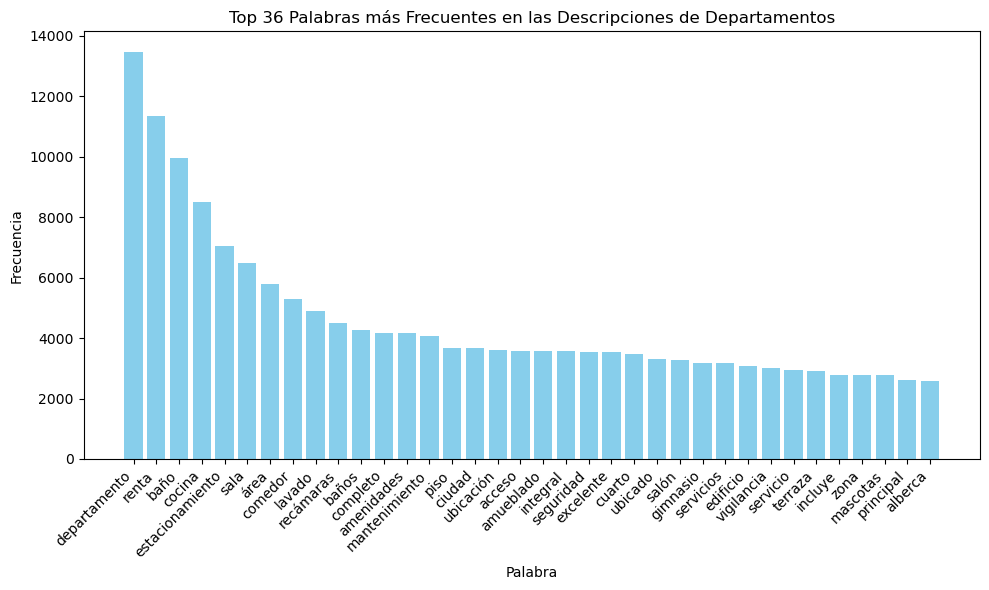

In [63]:

# 5. Generar el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Palabra'].head(top_n), word_freq_df['Frecuencia'].head(top_n), color='skyblue')
plt.title(f'Top {top_n} Palabras más Frecuentes en las Descripciones de Departamentos')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Guarda el gráfico como un archivo PNG
plt.savefig('palabras_frecuentes_plot.png')

# Puedes ver el gráfico directamente si trabajas en un entorno interactivo
# plt.show()

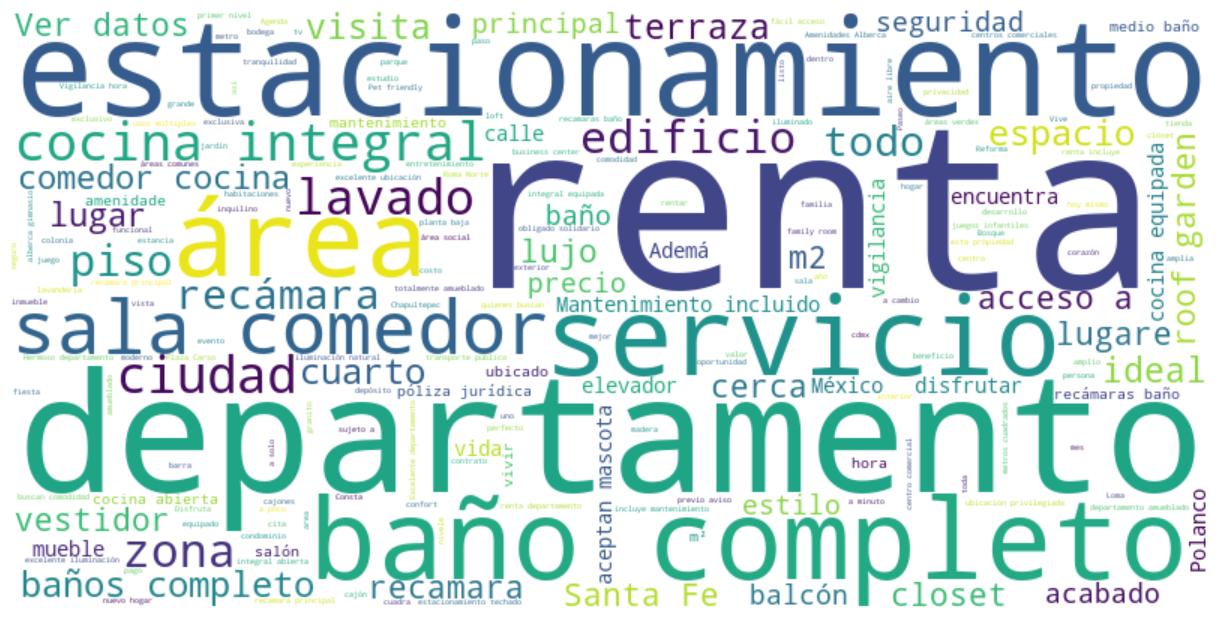

In [64]:
from wordcloud import WordCloud
# 2. Preprocesar el texto
# Combina todas las descripciones en una sola cadena de texto
text = ' '.join(df['Título'])

# 3. Generar la nube de palabras
wordcloud = WordCloud(
    stopwords=spanish_stopwords,
    background_color='white',
    width=800,
    height=400
).generate(text)

# 4. Mostrar el gráfico
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [65]:
pd.set_option('display.max_colwidth', 50)

In [66]:
#df[df.Título.str.contains('cuenta')]

In [67]:
# Sacamos otras características:
df['cuenta_con_cocina_integral'] = df['Título'].str.contains('cocina integral', case=False, na=False).astype(int)
df['cuenta_con_sala'] = df['Título'].str.contains('sala', case=False, na=False).astype(int)
df['cuenta_con_closet'] = df['Título'].str.contains('closet', case=False, na=False).astype(int)
df['cuenta_con_balcon'] = df['Título'].str.contains('balcon', case=False, na=False).astype(int)
df['cuenta_con_gimnasio'] = df['Título'].str.contains('gimnasio', case=False, na=False).astype(int)
df['cuenta_con_alberca'] = df['Título'].str.contains('alberca', case=False, na=False).astype(int)
df['cuenta_con_elevador'] = df['Título'].str.contains('elevador', case=False, na=False).astype(int)
df['cuenta_con_roof_garden'] = df['Título'].str.contains('roof garden', case=False, na=False).astype(int)
df['cuenta_con_terraza'] = df['Título'].str.contains('terraza', case=False, na=False).astype(int)
df['cuenta_con_comedor'] = df['Título'].str.contains('comedor|sala comedor', case=False, na=False).astype(int)
df['cuenta_con_area_de_lavado'] = df['Título'].str.contains('area de lavado', case=False, na=False).astype(int)
df['cuenta_con_salon_usos_multiples'] = df['Título'].str.contains('salón de usos multiples', case=False, na=False).astype(int)
df['cuenta_con_mantenimiento_incluido'] = df['Título'].str.contains('mantenimiento incluido|incluye mantenimiento', case=False, na=False).astype(int)
df['cuenta_con_vigilancia_24_horas'] = df['Título'].str.contains('vigilancia|vigilancia 24 horas|seguridad|seguridad 24 horas', case=False, na=False).astype(int)

In [68]:
# Dividir la columna 'Dirección' y expandir en nuevas columnas
# Usamos r'[,\n]' como la expresión regular para buscar tanto comas como saltos de línea
df_split = df['Dirección'].str.split(r'[,\n]', expand=True)

In [69]:
# df_split.shape[1] devuelve el número de columnas
num_cols = df_split.shape[1]
nombres_columnas = [f'direccion_{i+1}' for i in range(num_cols)]

# Asignar los nuevos nombres de columna
df_split.columns = nombres_columnas

In [70]:
# Concatenar las nuevas columnas con el DataFrame original
df = pd.concat([df, df_split], axis=1)

In [71]:
df.columns

Index(['Título', 'Enlace', 'Precio', 'Dirección', 'Características',
       'Municipio de Origen', 'precio_mxn', 'lote_m2', 'recamaras', 'baños',
       'estacionamiento', 'estacionamiento_txt', 'en_renta', 'en_venta',
       'es_amueblado', 'es_penthouse', 'cuenta_con_cocina_integral',
       'cuenta_con_sala', 'cuenta_con_closet', 'cuenta_con_balcon',
       'cuenta_con_gimnasio', 'cuenta_con_alberca', 'cuenta_con_elevador',
       'cuenta_con_roof_garden', 'cuenta_con_terraza', 'cuenta_con_comedor',
       'cuenta_con_area_de_lavado', 'cuenta_con_salon_usos_multiples',
       'cuenta_con_mantenimiento_incluido', 'cuenta_con_vigilancia_24_horas',
       'direccion_1', 'direccion_2', 'direccion_3', 'direccion_4',
       'direccion_5', 'direccion_6', 'direccion_7', 'direccion_8',
       'direccion_9'],
      dtype='object')

In [72]:
df.isnull().sum().sort_values(ascending=False)

direccion_9                          10249
direccion_8                          10228
direccion_7                          10087
direccion_6                           9966
direccion_5                           9815
direccion_4                           9301
recamaras                              289
baños                                  134
lote_m2                                 71
Características                          3
cuenta_con_elevador                      0
direccion_3                              0
direccion_2                              0
direccion_1                              0
cuenta_con_vigilancia_24_horas           0
cuenta_con_mantenimiento_incluido        0
cuenta_con_salon_usos_multiples          0
cuenta_con_area_de_lavado                0
cuenta_con_comedor                       0
cuenta_con_terraza                       0
cuenta_con_roof_garden                   0
Título                                   0
cuenta_con_alberca                       0
en_renta   

In [73]:
df.direccion_1.value_counts()

direccion_1
Polanco                             71
Miguel Hidalgo                      58
Miguel Hidalgo                      53
Dirección no informada              49
Cuauhtémoc                          46
                                    ..
Oscar Morineau 48                    1
TORRE CEDROS BOSQUES DE SANTA FE     1
Oscar Morineau 100                   1
Bosque                               1
Cerrada de las Granjas 125           1
Name: count, Length: 5461, dtype: int64

In [74]:
df['Dirección'].value_counts()

Dirección
Polanco\nPolanco, Miguel Hidalgo                        61
Roma Norte\nRoma Norte, Cuauhtémoc                      36
Campos Elíseos\nPolanco, Miguel Hidalgo                 29
Eugenio Sue\nPolanco, Miguel Hidalgo                    25
Bucareli\nJuárez, Cuauhtémoc                            24
                                                        ..
Avenida Rio Mixcoac\nAcacias, Benito Juárez              1
AV. EMPERADORES 40B\nPortales Oriente, Benito Juárez     1
Corregio\nCiudad de los Deportes, Benito Juárez          1
Xola 404\nDel Valle Norte, Benito Juárez                 1
Cerrada de las Granjas 125\nEl Jagüey, Azcapotzalco      1
Name: count, Length: 6450, dtype: int64

Esta estrategia de obtener una dirección más limpia no funcionó porque tienen diferentes estructuras.
Tendremos que usar un enfoque diferente para extraer, al menos la colonia, el código postal y la calle con el archivo de Códigos Postales.

In [75]:
df_cp = pd.read_csv('../../data/raw/CP/CPdescarga - Distrito_Federal.csv')


In [76]:
df_cp.head()

,d_codigo,d_asenta,d_tipo_asenta,D_mnpio,d_estado,d_ciudad,d_CP,c_estado,c_oficina,c_CP,c_tipo_asenta,c_mnpio,id_asenta_cpcons,d_zona,c_cve_ciudad
0,1000,San Ángel,Colonia,Álvaro Obregón,Ciudad de México,Ciudad de México,1001,9,1001,NaN,9,10,1,Urbano,1.0
1,1010,Los Alpes,Colonia,Álvaro Obregón,Ciudad de México,Ciudad de México,1001,9,1001,NaN,9,10,5,Urbano,1.0
2,1020,Guadalupe Inn,Colonia,Álvaro Obregón,Ciudad de México,Ciudad de México,1001,9,1001,NaN,9,10,6,Urbano,1.0
3,1030,Axotla,Pueblo,Álvaro Obregón,Ciudad de México,Ciudad de México,1001,9,1001,NaN,28,10,9,Urbano,1.0
4,1030,Florida,Colonia,Álvaro Obregón,Ciudad de México,Ciudad de México,1001,9,1001,NaN,9,10,10,Urbano,1.0


In [77]:
df_cp.d_tipo_asenta.value_counts()

d_tipo_asenta
Colonia         1269
Barrio           160
Pueblo            87
Equipamiento       9
Campamento         3
Aeropuerto         1
Name: count, dtype: int64

In [78]:
df_cp = df_cp[df_cp.d_tipo_asenta.isin(['Colonia', 'Barrio','Pueblo'])]

In [79]:
# Estandarizar texto: quitar acentos, convertir a minúsculas, eliminar espacios extra y reemplazar "\n" por " "
def estandarizar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = texto.replace("\n", " ")  # Reemplazar saltos de línea por espacios
    return unidecode.unidecode(texto.strip().lower())


In [80]:
# Estandarizar las columnas necesarias
df['direccion'] = df['Dirección'].apply(estandarizar_texto)
df['municipio'] = df['Municipio de Origen'].apply(estandarizar_texto)
df_cp['d_asenta'] = df_cp['d_asenta'].apply(estandarizar_texto)
df_cp['d_codigo'] = df_cp['d_codigo'].astype(str).apply(estandarizar_texto)

In [81]:
df['direccion'] = df['direccion'].str.replace('santa maria maninalco', 'santa maria malinalco')
df['direccion'] = df['direccion'].str.replace('country club', 'churubusco country club')


In [82]:
# Crear una función para extraer colonia y CP
def extraer_colonia_cp(direccion, df_cp):
    for _, row in df_cp.iterrows():
        if row['d_asenta'] in direccion:
            return row['d_asenta'], row['d_codigo']
    return None, None

In [83]:
# Aplicar la función a cada fila del DataFrame
df[['colonia', 'cp']] = df['direccion'].apply(
    lambda x: pd.Series(extraer_colonia_cp(x, df_cp))
)

In [84]:
df.colonia.isnull().sum() 

74

In [85]:
df.cp.isnull().sum() 

74

In [86]:
df[df.colonia.isnull()]['direccion'].value_counts()

direccion
calzada ignacio zaragoza 2980 la concordia, iztapalapa                         4
lindavista lindavista, gustavo a. madero                                       4
av pacifico 312 coyoacan, ciudad de mexico                                     4
economia 17 copilco, coyoacan                                                  3
prolongacion santa tecla 551 coyoacan, ciudad de mexico                        3
cerro tikal copilco, coyoacan                                                  3
economia copilco, coyoacan                                                     3
real de san martin 103 al 200 azcapotzalco, ciudad de mexico                   2
florales coyoacan, ciudad de mexico                                            2
antiguo camino a xochimilco 35 xochimilco, ciudad de mexico                    2
avenida rio churubusco 331 iztapalapa, ciudad de mexico                        2
lerdo de tejada 110 departamento b-301 iztapalapa, ciudad de mexico            2
damiana iztapalapa

In [87]:
df.colonia.value_counts()

colonia
hidalgo                                2964
cuauhtemoc                             1595
santa fe                                563
cuajimalpa                              385
napoles                                 233
                                       ... 
felipe pescador                           1
americas unidas                           1
pro-hogar                                 1
sindicato mexicano de electricistas       1
ampliacion petrolera                      1
Name: count, Length: 348, dtype: int64

In [88]:
from geopy.geocoders import Nominatim
import time

In [89]:
# Inicializar el cliente de Nominatim
geolocator = Nominatim(user_agent="mi_aplicacion")

In [95]:
# Función para obtener colonia y código postal usando Nominatim
def completar_colonia_cp(direccion):
    try:
        # Obtener coordenadas de la dirección
        location = geolocator.geocode(direccion)
        if location:
            # Obtener detalles adicionales (como colonia y CP)
            detalles = geolocator.reverse((location.latitude, location.longitude), language="es")
            address = detalles.raw.get('address', {})
            colonia = address.get('neighbourhood', None)
            codigo_postal = address.get('postcode', None)
            return colonia, codigo_postal
        else:
            return None, None
    except Exception as e:
        print(f"Error procesando la dirección '{direccion}': {e}")
        return None, None

In [100]:
# Aplicar la función a las filas donde la columna 'colonia' es nula
def completar_direcciones(df):
    # Filtrar las filas donde 'colonia' es nula
    df_incompleto = df[df['colonia'].isnull()]
    
    # Iterar sobre las filas y completar los datos
    for idx, row in df_incompleto.iterrows():
        colonia, cp = completar_colonia_cp(row['direccion'])
        if colonia:
            df.at[idx, 'colonia'] = str(colonia).replace('colonia ' , '').replace('Colonia ' , '')
        if cp:
            df.at[idx, 'cp'] = cp
        time.sleep(1)  # Respetar el límite de 1 solicitud por segundo de Nominatim
    
    return df

In [101]:
location = geolocator.geocode('avenida rio churubusco 331 iztapalapa, ciudad de mexico  ')
# Obtener detalles adicionales (como colonia y CP)
detalles = geolocator.reverse((location.latitude, location.longitude), language="es")
address = detalles.raw.get('address', {})
colonia = address.get('neighbourhood', None)
codigo_postal = address.get('postcode', None)

In [102]:
address

{'house_number': '331',
 'road': 'Avenida Río Churubusco',
 'neighbourhood': 'Colonia Sinatel',
 'city': 'Ciudad de México',
 'borough': 'Iztapalapa',
 'state': 'Ciudad de México',
 'ISO3166-2-lvl4': 'MX-CMX',
 'postcode': '09080',
 'country': 'México',
 'country_code': 'mx'}

In [103]:
df = completar_direcciones(df)

Error procesando la dirección 'calzada ignacio zaragoza 2980 la concordia, iztapalapa': HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=calzada+ignacio+zaragoza+2980+la+concordia%2C+iztapalapa&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


In [104]:
df.colonia.isnull().sum()

26

In [105]:
df.cp.isnull().sum()

25

In [106]:
df[df.colonia.isnull()]['direccion'].value_counts()

direccion
calzada ignacio zaragoza 2980 la concordia, iztapalapa                         4
florales coyoacan, ciudad de mexico                                            2
lerdo de tejada 110 departamento b-301 iztapalapa, ciudad de mexico            2
prados de churubusco prados iztapalapa, iztapalapa                             2
real de san martin 103 al 200 azcapotzalco, ciudad de mexico                   2
calle de ferrocarril central 594 hogares ferrocarrileros, azcapotzalco         1
reforma 52 coyoacan, ciudad de mexico                                          1
avenida hacienda de narvarte trabajadores de pemex, azcapotzalco               1
privada esfuerzo coyoacan, ciudad de mexico                                    1
vitrales rinconada del sur, xochimilco                                         1
chicle residencial zaragoza, iztacalco                                         1
lindavista conejos #20 lindavista, gustavo a. madero                           1
salaverry & av ins

In [107]:
df.columns

Index(['Título', 'Enlace', 'Precio', 'Dirección', 'Características',
       'Municipio de Origen', 'precio_mxn', 'lote_m2', 'recamaras', 'baños',
       'estacionamiento', 'estacionamiento_txt', 'en_renta', 'en_venta',
       'es_amueblado', 'es_penthouse', 'cuenta_con_cocina_integral',
       'cuenta_con_sala', 'cuenta_con_closet', 'cuenta_con_balcon',
       'cuenta_con_gimnasio', 'cuenta_con_alberca', 'cuenta_con_elevador',
       'cuenta_con_roof_garden', 'cuenta_con_terraza', 'cuenta_con_comedor',
       'cuenta_con_area_de_lavado', 'cuenta_con_salon_usos_multiples',
       'cuenta_con_mantenimiento_incluido', 'cuenta_con_vigilancia_24_horas',
       'direccion_1', 'direccion_2', 'direccion_3', 'direccion_4',
       'direccion_5', 'direccion_6', 'direccion_7', 'direccion_8',
       'direccion_9', 'direccion', 'municipio', 'colonia', 'cp'],
      dtype='object')

In [108]:
important_columns = ['precio_mxn', 'lote_m2', 'recamaras', 'baños',
       'estacionamiento', 'es_amueblado', 'es_penthouse',
       'cuenta_con_cocina_integral', 'cuenta_con_sala', 'cuenta_con_closet',
       'cuenta_con_balcon', 'cuenta_con_gimnasio', 'cuenta_con_alberca',
       'cuenta_con_elevador', 'cuenta_con_roof_garden', 'cuenta_con_terraza',
       'cuenta_con_comedor', 'cuenta_con_area_de_lavado',
       'cuenta_con_salon_usos_multiples', 'cuenta_con_mantenimiento_incluido',
       'cuenta_con_vigilancia_24_horas', 'direccion',
       'colonia', 'cp', 'municipio']

In [109]:
df.municipio.value_counts()

municipio
miguel hidalgo            3313
cuauhtemoc                2305
benito juarez             1540
cuajimalpa de morelos      944
alvaro obregon             862
coyoacan                   318
tlalpan                    195
azcapotzalco               171
gustavo a. madero          163
iztacalco                  102
venustiano carranza         93
xochimilco                  64
tlahuac                     63
iztapalapa                  63
la magdalena contreras      61
Name: count, dtype: int64

In [110]:
df[df.colonia.isnull() == False][important_columns].to_parquet('../../data/processed/inmuebles24_departamentos.parquet', index=False)